비 지도학습

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [138]:
from sklearn.datasets import load_wine #싸이키런 데이터셋에 있는 와인 데이터 패키지
wine = load_wine()

In [139]:
print(wine.DESCR) #데이터 설명

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [140]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [141]:
data = pd.DataFrame(data, columns=columns)
data.head

<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonf

In [142]:
#k-Means

# 데이터 전처리
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [143]:
data.shape #차원 확인 -> 비 지도 학습에서 차원이 넓으면 찾기 힘듬 축소가 필요

(178, 13)

In [144]:
#PCA(차원의 축소)
from sklearn.decomposition import PCA #PCA패키지
pca = PCA(n_components=2) #차원의 수
data = pca.fit_transform(data) #n(2)차원 적용

In [145]:
data

array([[-7.06335756e-01, -2.53192753e-01],
       [-4.84976802e-01, -8.82289142e-03],
       [-5.21172266e-01, -1.89187222e-01],
       [-8.21643663e-01, -5.80905512e-01],
       [-2.02546382e-01, -5.94665740e-02],
       [-6.08190152e-01, -4.87519191e-01],
       [-5.44047399e-01, -3.00196497e-01],
       [-4.74357495e-01, -2.98197021e-01],
       [-5.00432012e-01, -3.07602859e-01],
       [-6.27517969e-01, -2.06328233e-01],
       [-7.27467157e-01, -3.56512044e-01],
       [-3.74967744e-01, -2.25424535e-01],
       [-4.48188283e-01, -2.31938139e-01],
       [-6.26345329e-01, -3.55138677e-01],
       [-8.35717011e-01, -5.38047802e-01],
       [-4.71931568e-01, -3.37405385e-01],
       [-4.26990905e-01, -4.50842684e-01],
       [-3.66595704e-01, -3.15750341e-01],
       [-7.18788533e-01, -5.93881332e-01],
       [-4.58884986e-01, -1.75782240e-01],
       [-6.61852288e-01, -1.27831032e-01],
       [-2.67900032e-01,  9.81127565e-03],
       [-5.99782399e-01,  7.82494523e-04],
       [-4.

In [146]:
from sklearn.cluster import KMeans #KMeans 알고리즘 패키지
kmeans = KMeans(n_clusters=3) #3가지로 구분한다(구분 값)

In [147]:
kmeans.fit(data) #학습

KMeans(n_clusters=3)

In [148]:
cluster = kmeans.predict(data) #유추

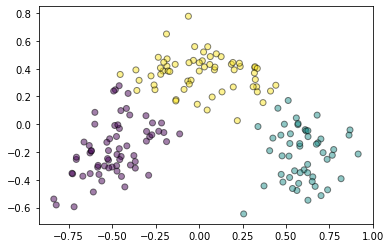

In [149]:
plt.scatter(data[:,0], data[:,1], c=cluster, alpha=0.5, edgecolors='black', linewidths=1) #x,y 그래프 찍어보기, 유추값 색상 입히기

In [150]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering #객체 패키지
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single') #객체1, 두 클러스터 내의 가장 가까운 점 사이의 거리(가까운 선상)
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')#객체2, 두 클러스터 내의 가장 먼 점 사이의 거리(반대 선상)
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')#객체3, 두 클러스터 내의 모든 점 사이의 평균 거리(각 거리 모든 평균 선상)


In [151]:
#학습
single_clustering.fit(data)
complete_clustering.fit(data)
average_clustering.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [152]:
single_cluster = single_clustering.labels_
complete_cluster = complete_clustering.labels_
average_cluster = average_clustering.labels_

In [153]:
print(single_cluster)
print(complete_cluster)
print(average_cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 

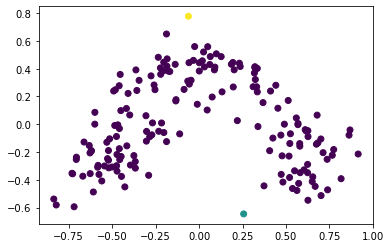

In [154]:
plt.scatter(data[:,0],data[:,1],c=single_cluster)

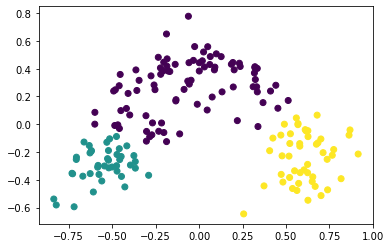

In [155]:
plt.scatter(data[:,0],data[:,1],c=complete_cluster)

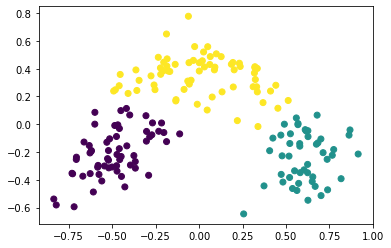

In [156]:
plt.scatter(data[:,0],data[:,1],c=average_cluster)

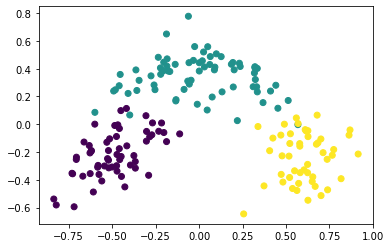

In [157]:
plt.scatter(data[:,0],data[:,1],c=label)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [32.5, 32.5, 55.0, 55.0],
  [43.75, 43.75, 65.0, 65.0],
  [10.0, 10.0, 54.375, 54.375],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [92.5, 92.5, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [132.5, 132.5, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [143.75, 143.75, 170.0, 170.0],
  [156.875, 156.875, 185.0, 185.0],
  [170.9375, 170.9375, 195.0, 195.0],
  [103.75, 103.75, 182.96875, 182.96875],
  [205.0, 205.0, 215.0, 215.0],
  [143.359375, 143.359375, 210.0, 210.0],
  [176.6796875, 176.6796875, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [200.83984375, 200.83984375, 250.0, 250.0],
  [75.0, 75.0, 225.419921875, 225.419921875],
  [275.0, 275.0, 285.0, 285.0],
  [280.0, 280.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [287.5, 287.5,

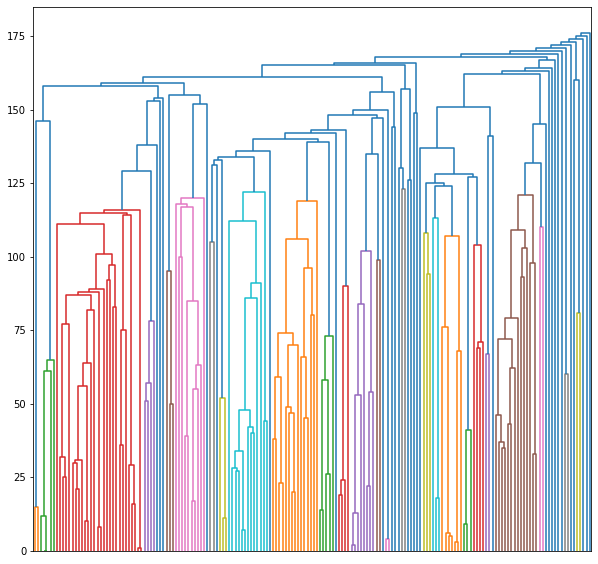

In [158]:
from scipy.cluster.hierarchy import dendrogram #결과를 볼 때 쓰는 패키지 dendrogram
plt.figure(figsize=(10,10))
children = single_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p=len(data), labels=single_cluster,
           show_contracted=True, no_labels=True) 

In [160]:
# Silhouette(실루엣), 비지도학습 결과 계산
from sklearn.metrics import silhouette_score
best_n = 1
best_score = -1

for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data, cluster)

    print('클러스터의 수 : {} 실루엣 점서 : {:.2f}'.format(n_clusters, score))
    if score > best_score:
        best_n = n_clusters
        best_score = score
print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 {:.2f}'.format(best_n, best_score))

클러스터의 수 : 2 실루엣 점서 : 0.49
클러스터의 수 : 3 실루엣 점서 : 0.57
클러스터의 수 : 4 실루엣 점서 : 0.49
클러스터의 수 : 5 실루엣 점서 : 0.46
클러스터의 수 : 6 실루엣 점서 : 0.43
클러스터의 수 : 7 실루엣 점서 : 0.40
클러스터의 수 : 8 실루엣 점서 : 0.39
클러스터의 수 : 9 실루엣 점서 : 0.40
클러스터의 수 : 10 실루엣 점서 : 0.40
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 0.57


In [163]:
# Silhouette(실루엣), 비 지도학습 결과 계산, 라벨 갯수 3개일때 제일 점수가 좋다
from sklearn.metrics import silhouette_score
best_n = 1
best_score = -1

for n_clusters in range(2,11):
    average_clustering =AgglomerativeClustering(n_clusters=n_clusters,linkage='average')
    average_clustering.fit(data)
    cluster = average_clustering.labels_
    score = silhouette_score(data, cluster)

    print('클러스터의 수 : {} 실루엣 점서 : {:.2f}'.format(n_clusters, score))
    if score > best_score:
        best_n = n_clusters
        best_score = score
print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 {:.2f}'.format(best_n, best_score))

클러스터의 수 : 2 실루엣 점서 : 0.49
클러스터의 수 : 3 실루엣 점서 : 0.56
클러스터의 수 : 4 실루엣 점서 : 0.48
클러스터의 수 : 5 실루엣 점서 : 0.42
클러스터의 수 : 6 실루엣 점서 : 0.37
클러스터의 수 : 7 실루엣 점서 : 0.34
클러스터의 수 : 8 실루엣 점서 : 0.34
클러스터의 수 : 9 실루엣 점서 : 0.37
클러스터의 수 : 10 실루엣 점서 : 0.33
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 0.56
